In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

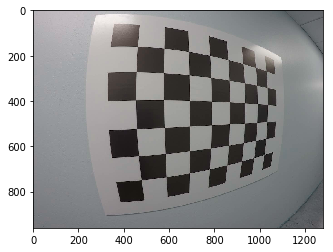

In [2]:
img = cv2.imread('calibration_wide/test_image2.png')
plt.imshow(img)

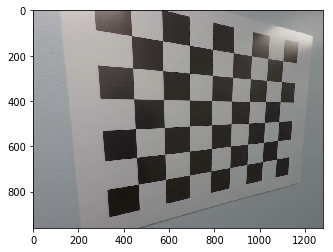

In [3]:
dist_pickle = pickle.load( open( "calibration_wide/wide_dist_pickle2.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

undist = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undist)

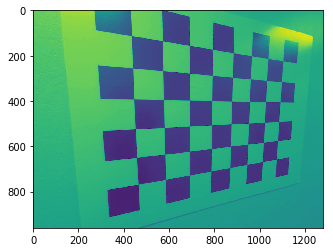

In [4]:
gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

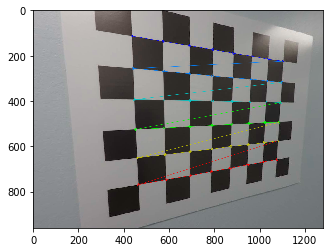

In [5]:
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

cv2.drawChessboardCorners(undist, (8,6), corners, ret)

plt.imshow(undist)

In [7]:
corners

array([[[ 436.50708 ,  114.335556]],

       [[ 573.60016 ,  137.86545 ]],

       [[ 691.3621  ,  156.4137  ]],

       [[ 793.9415  ,  174.45566 ]],

       [[ 884.1121  ,  190.4149  ]],

       [[ 966.1258  ,  203.40602 ]],

       [[1037.9983  ,  215.59805 ]],

       [[1103.9984  ,  224.66327 ]],

       [[ 441.40646 ,  256.57117 ]],

       [[ 575.6067  ,  268.5169  ]],

       [[ 691.44507 ,  279.54266 ]],

       [[ 792.4461  ,  289.64633 ]],

       [[ 881.6209  ,  297.7213  ]],

       [[ 962.3346  ,  304.2809  ]],

       [[1033.0236  ,  311.5912  ]],

       [[1098.5     ,  317.5     ]],

       [[ 447.05347 ,  393.79935 ]],

       [[ 577.4161  ,  395.537   ]],

       [[ 692.3993  ,  397.60666 ]],

       [[ 791.0025  ,  400.09674 ]],

       [[ 878.70465 ,  401.76456 ]],

       [[ 956.86456 ,  403.5924  ]],

       [[1026.5544  ,  405.12177 ]],

       [[1092.2971  ,  407.17816 ]],

       [[ 453.26105 ,  525.3415  ]],

       [[ 580.83453 ,  518.74023 ]],

       [[ 69

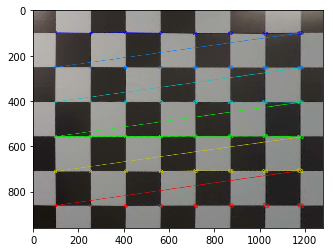

In [9]:
offset = 100
img_size = (gray.shape[1], gray.shape[0])

src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                 [img_size[0]-offset, img_size[1]-offset], [offset, img_size[1]-offset]])

M = cv2.getPerspectiveTransform(src, dst)
warped = cv2.warpPerspective(undist, M, img_size)

plt.imshow(warped)

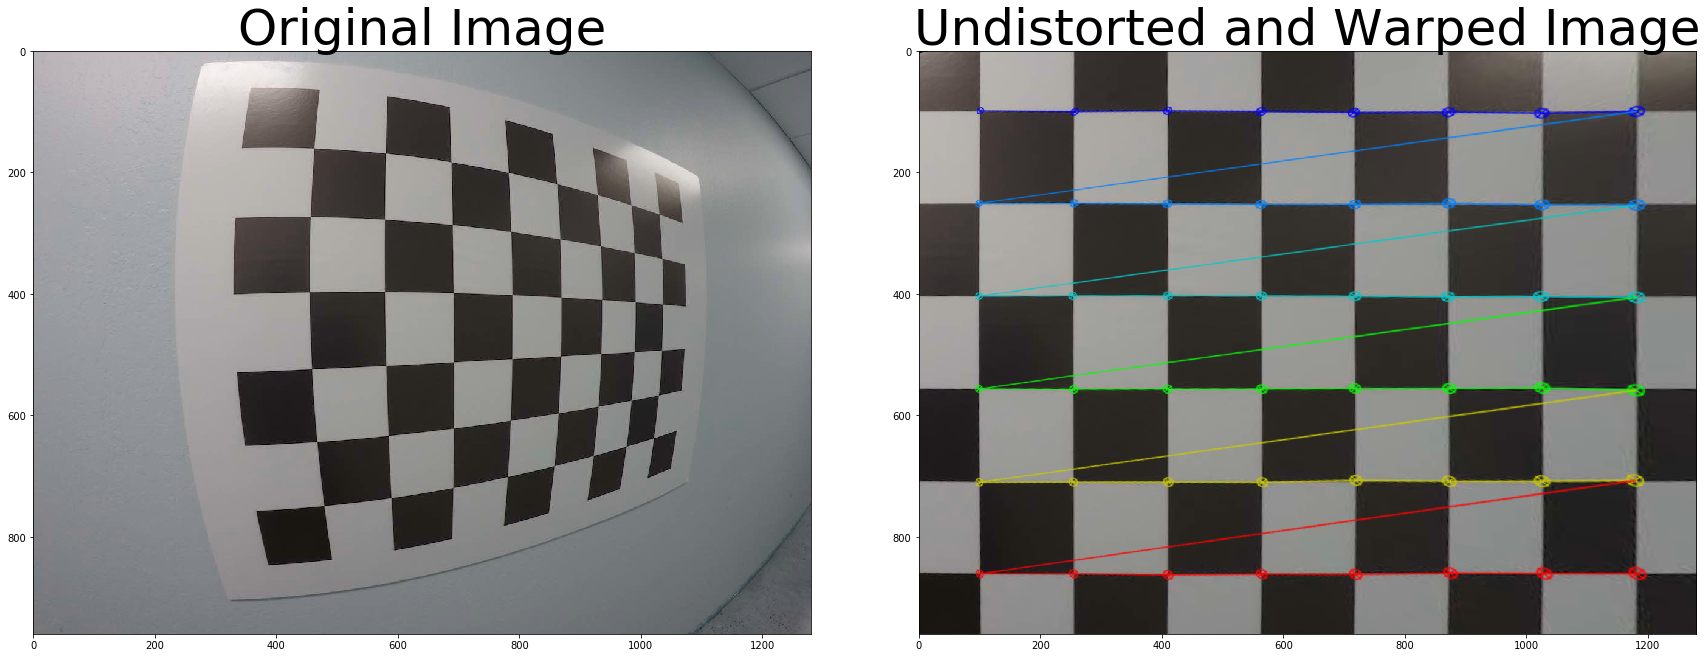

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(warped)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.show()